In [0]:
import pandas as pd
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf
import numpy.random as nr
import sklearn.model_selection as ms
from sklearn import preprocessing
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline 

TensorFlow 2.x selected.


In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
x_train.shape

170500096/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

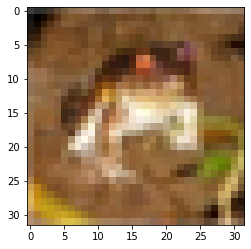

In [0]:
plt.imshow(x_train[0], interpolation='nearest')
plt.show()

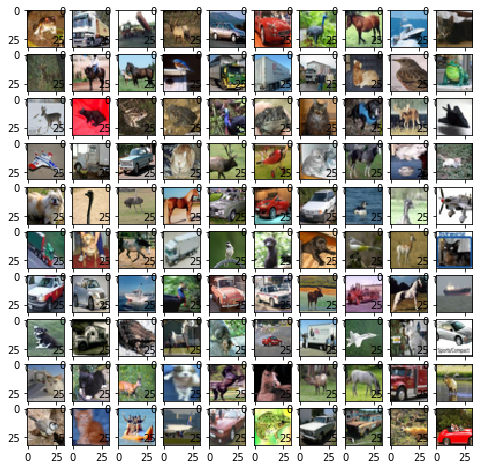

In [0]:
fig, axes = plt.subplots(10,10, figsize=(8,8))

for i,ax in enumerate(axes.flat):
    ax.imshow(x_train[i])

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
x_train.shape

(50000, 32, 32, 3)

In [0]:
"""
tf.random.set_seed(0)

activation_fn = tf.nn.elu #tf.nn.re
n_filters = 192
n_kernals = 3

inputs = tf.keras.Input(shape=(32, 32, 3), name='img')
x = tf.keras.layers.Dropout(0.2)(inputs)
x = tf.keras.layers.Conv2D(n_filters, n_kernals, kernel_regularizer=regularization_fn(regularization_rate), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = activation_fn(x)
x = tf.keras.layers.Conv2D(n_filters, n_kernals, kernel_regularizer=regularization_fn(regularization_rate), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = activation_fn(x)
x = tf.keras.layers.Conv2D(n_filters, n_kernals, kernel_regularizer=regularization_fn(regularization_rate), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = activation_fn(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Conv2D(n_filters, n_kernals, kernel_regularizer=regularization_fn(regularization_rate), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = activation_fn(x)
x = tf.keras.layers.Conv2D(n_filters, n_kernals, kernel_regularizer=regularization_fn(regularization_rate), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = activation_fn(x)
x = tf.keras.layers.Conv2D(n_filters, n_kernals, kernel_regularizer=regularization_fn(regularization_rate), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = activation_fn(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Conv2D(n_filters, n_kernals, kernel_regularizer=regularization_fn(regularization_rate), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = activation_fn(x)
x = tf.keras.layers.Conv2D(n_filters, n_kernals, kernel_regularizer=regularization_fn(regularization_rate), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = activation_fn(x)
x = tf.keras.layers.Conv2D(n_filters, n_kernals, kernel_regularizer=regularization_fn(regularization_rate), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = activation_fn(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Flatten()(x)
predictions = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, predictions, name='toy_resnet')
model.summary()
"""

In [0]:
tf.random.set_seed(0)

activation_fn = tf.nn.elu #tf.nn.relu
regularization_fn = tf.keras.regularizers.l2
n_filters = 256
n_kernals = 3
residual_tower_size = 4
regularization_rate=6.5e-4

inputs = tf.keras.Input(shape=(32, 32, 3), name='img')
x = tf.keras.layers.Conv2D(n_filters, n_kernals, kernel_regularizer=regularization_fn(regularization_rate), padding='same')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
block_output = activation_fn(x)

# Build residual tower
for _ in range(residual_tower_size):
    x = tf.keras.layers.Conv2D(n_filters, n_kernals, kernel_regularizer=regularization_fn(regularization_rate), padding='same')(block_output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = activation_fn(x)
    x = tf.keras.layers.Conv2D(n_filters, n_kernals, kernel_regularizer=regularization_fn(regularization_rate), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.add([x, block_output])
    block_output = activation_fn(x)

x = tf.keras.layers.Conv2D(2, 1, kernel_regularizer=regularization_fn(regularization_rate), padding='same')(block_output)
x = tf.keras.layers.BatchNormalization()(x)
x = activation_fn(x)
x = tf.keras.layers.Flatten()(x)
#x = tf.keras.layers.Dense(256, kernel_regularizer=regularization_fn(regularization_rate))(x)
#x = tf.keras.layers.BatchNormalization()(x)
#x = activation_fn(x)
#x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, predictions, name='toy_resnet')
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_146 (Conv2D)             (None, 32, 32, 256)  7168        img[0][0]                        
__________________________________________________________________________________________________
batch_normalization_152 (BatchN (None, 32, 32, 256)  1024        conv2d_146[0][0]                 
__________________________________________________________________________________________________
tf_op_layer_Elu_152 (TensorFlow [(None, 32, 32, 256) 0           batch_normalization_152[0][0]    
_________________________________________________________________________________________

In [0]:
#model = keras.models.load_model('cifar_resnet_model_{epoch}.h5')
#model = keras.models.load_model('cifar_resnet_model.h5')
filepath = 'cifar_resnet_model.h5'

In [0]:
#optimizer = tf.keras.optimizers.SGD(learning_rate=.0004, momentum=0.9) #tf.keras.optimizers.Adam()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10), 
            tf.keras.callbacks.ModelCheckpoint(filepath=filepath, save_best_only=True, monitor='val_loss', verbose=1),
            tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_lr=0.00001)]
model.fit(x_train, y_train, epochs=100, validation_split=0.2, callbacks=callback)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
39968/40000 [============================>.] - ETA: 0s - loss: 2.0937 - accuracy: 0.3866
Epoch 00001: val_loss improved from inf to 1.68227, saving model to cifar_resnet_model.h5
40000/40000 [==============================] - 89s 2ms/sample - loss: 2.0933 - accuracy: 0.3866 - val_loss: 1.6823 - val_accuracy: 0.4445
Epoch 2/100
39968/40000 [============================>.] - ETA: 0s - loss: 1.5779 - accuracy: 0.4744
Epoch 00002: val_loss improved from 1.68227 to 1.61945, saving model to cifar_resnet_model.h5
40000/40000 [==============================] - 87s 2ms/sample - loss: 1.5776 - accuracy: 0.4744 - val_loss: 1.6195 - val_accuracy: 0.4568
Epoch 3/100
39968/40000 [============================>.] - ETA: 0s - loss: 1.4952 - accuracy: 0.5048
Epoch 00003: val_loss did not improve from 1.61945
40000/40000 [==============================] - 87s 2ms/sample - loss: 1.4953 - accuracy: 0.5047 - val_loss: 1.6406 - val_accuracy: 0.456

In [0]:
model = tf.keras.models.load_model(filepath)

In [0]:
model.evaluate(x_train,  y_train, verbose=2)

In [0]:
model.evaluate(x_test,  y_test, verbose=2)